# Imports

In [3]:
import os   # for path operations
import datetime

import numpy as np                          
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

Pandas print setup:

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Read all measurement files and visualize tracks

Read all the measurement time series files into some manageable python format (dict of pandas dataframes), and plot the path for each measurement

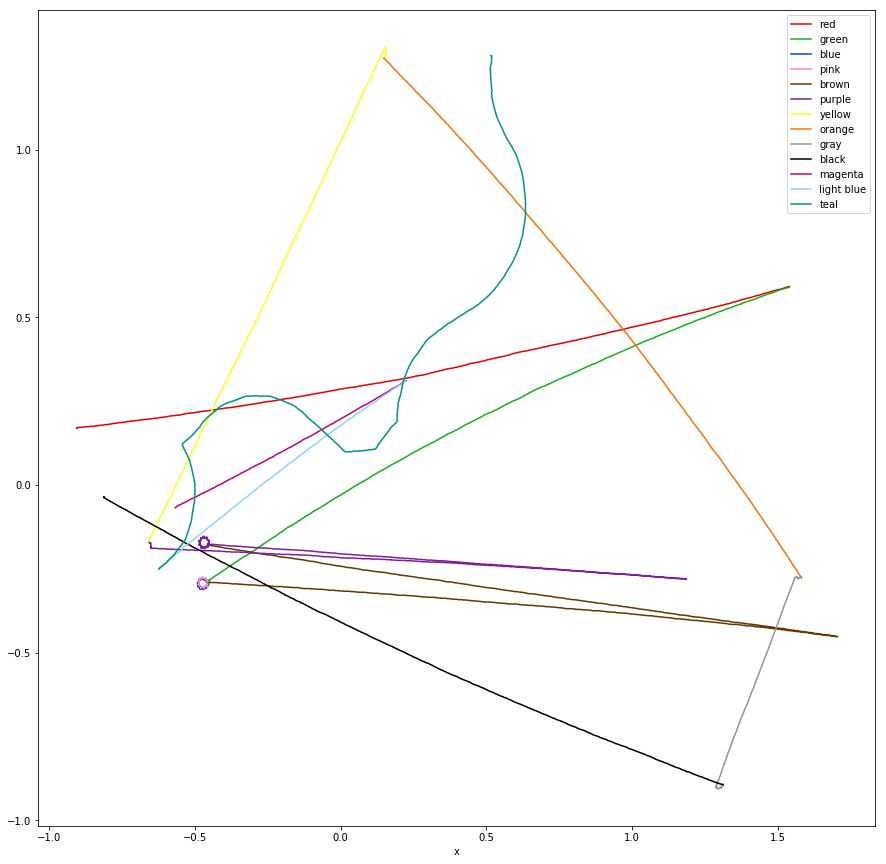

In [5]:
# Create canvas for plots
f, ax = plt.subplots(1, 1)
# List of colors for all the different measurements, any extra xkcd color can be added for further measurements
colors = ['xkcd:red', 'xkcd:green', 'xkcd:blue', 'xkcd:pink', 'xkcd:brown', 'xkcd:purple', 'xkcd:yellow', 'xkcd:orange',
          'xkcd:gray', 'xkcd:black', 'xkcd:magenta', 'xkcd:light blue', 'xkcd:teal', 'xkcd:light green']
# empty dict, that will be filled later when reading files, key: value pairs will be color: file_timestamp pairs,
# so later we can find measurement date by color
color_mapping = {}
# empty dict, that will be filled with the measurement data later when reading files 
data_dict = {}
# indexer for color list
i = 0
#iterate through all files in the measurement folder
for FILE_NAME in os.listdir('..\\DATA\\RAW\\Measure_01'):
    # if its an imu file -> read with the given column names and save to the data_dict under [original timestamp]['IMU'] keys
    if FILE_NAME[-7:-4] == 'IMU':
        imu_data = pd.read_csv('..\\DATA\\RAW\\Measure_01\\' + FILE_NAME,
                               sep='\t',
                               decimal=',',
                               names=['time', 'acc0', 'acc1', 'acc2', 'gyro0', 'gyro1', 'gyro2', 'mag0', 'mag1', 'mag2'])
        data_dict[FILE_NAME[:-8]] = {}
        data_dict[FILE_NAME[:-8]]['IMU'] = imu_data
    # if its a mocap file -> read with the given column names and save to the data_dict under [original timestamp]['MoCap'] keys
    elif FILE_NAME[-9:-4] == 'MoCap':
        mocap_data = pd.read_csv('..\\DATA\\RAW\\Measure_01\\' + FILE_NAME,
                                 sep='\t',
                                 decimal=',',
                                 names=['time', 'x', 'y', 'z', 'tracked', 'beta'])
        data_dict[FILE_NAME[:-10]]['MoCap'] = mocap_data
        # save the corresponding timestamp to the color and vice versa
        color_mapping[colors[i][5:]] = FILE_NAME[:-10]
        data_dict[FILE_NAME[:-10]]['color'] = colors[i][5:]
        # add the track with the given color to the plot
        mocap_data.plot(x='x', y='z', color=colors[i], figsize=(15,15), label=colors[i][5:], ax=ax)
        # increase the indexer, so next time a new color will be used
        i+=1

# Visualize the IMU data for any of the ploted tracks

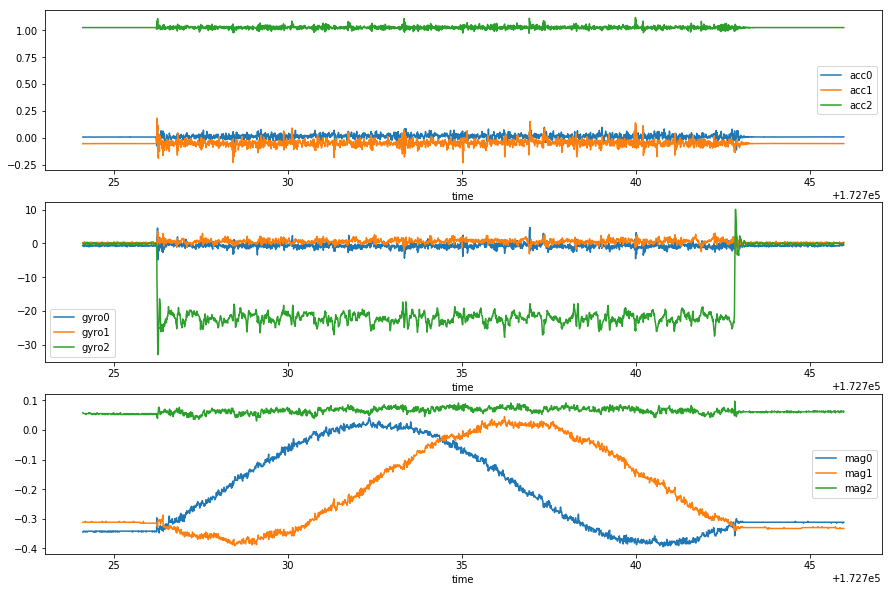

In [6]:
# Choose a track from the upper plot, and provide its color name from the legend
the_chosen_one = 'blue'
# Create 3 axes for acc, gyro and magneto charts
f1, (ax1, ax2, ax3) = plt.subplots(3, 1)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='acc0', figsize=(15,10), ax=ax1)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='acc1', ax=ax1)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='acc2', ax=ax1)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='gyro0', ax=ax2)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='gyro1', ax=ax2)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='gyro2', ax=ax2)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='mag0', ax=ax3)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='mag1', ax=ax3)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='mag2', ax=ax3)

# Split the data to train / valid / test groups

Our task is some kind of a time series prediction, so we can only shuffle and split the measurements but not the data slices inside them.
We will randomly choose the files for each groups, in a ratio of 8:2:1

In [32]:
valid_split = 0.2
test_split = 0.1

In [33]:
# Create containers for the 3 group
train_dict = {}
valid_dict = {}
test_dict = {}

In [34]:
# Set random seed
np.random.seed(1)
# Createrandom permutation to sort our files
random_order = np.random.permutation(len(data_dict))

In [35]:
# Loop over the data dict and decide for each measurement if it goes to train / valid / test group
for random_number, key in zip(np.nditer(random_order), data_dict):
    if random_number <= (len(data_dict)-1) * (1-valid_split-test_split):
        train_dict[key] = data_dict[key]
    elif random_number <= (len(data_dict)-1) * (1-test_split):
        valid_dict[key] = data_dict[key]
    else:
        test_dict[key] = data_dict[key]

In [41]:
print('# all measurements: ', len(data_dict))
print('# measurements in the train dataset: ', len(train_dict))
print('# measurements in the validation dataset: ', len(valid_dict))
print('# measurements in the test dataset: ', len(test_dict))

# all measurements:  13
# measurements in the train dataset:  9
# measurements in the validation dataset:  2
# measurements in the test dataset:  2
